In [1]:
import pandas as pd

In [2]:
data = {
    'Credit score': [750, 680, 620, 800, 720],
    'Income': [5000, 4000, 3000, 6000, 4500],
    'Loan amount': [10000, 8000, 5000, 12000, 10000],
    'Loan term': ['short-term', 'short-term', 'long-term', 'long-term', 'short-term'],
    'Employment status': ['employed', 'employed', 'unemployed', 'employed', 'self-employed'],
    'Previous delinquencies': ['no', 'yes', 'no', 'no', 'yes'],
    'Loan approval': ['yes', 'no', 'no', 'yes', 'yes']
}

d = pd.DataFrame(data)
print(d.head(5))

   Credit score  Income  Loan amount   Loan term Employment status  \
0           750    5000        10000  short-term          employed   
1           680    4000         8000  short-term          employed   
2           620    3000         5000   long-term        unemployed   
3           800    6000        12000   long-term          employed   
4           720    4500        10000  short-term     self-employed   

  Previous delinquencies Loan approval  
0                     no           yes  
1                    yes            no  
2                     no            no  
3                     no           yes  
4                    yes           yes  


In [3]:
# Using this dataset, you could build a decision tree to help the bank determine which loan applications to approve and which 
#to reject based on the customer's characteristics.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) & target(y):

X = d.drop('Loan approval', axis=1)
y = d['Loan approval']

# Convert categorical variables into numerical:

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# predict test set:

y_pred = clf.predict(X_test)

# calculate the accurancy:

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.0


In [5]:
# Create dataset for the above structure and draw the decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

# Split the dataset into features (X) & target(y):

X = d.drop('Loan approval', axis=1)
y = d['Loan approval']

# Convert categorical variables into numerical:

X_encoded = pd.get_dummies(X)

# Create and train the decision tree classifier:

clf = DecisionTreeClassifier()
clf.fit(X_encoded, y)

# Visualize:

data = tree.export_graphviz(clf, out_file=None, feature_names=X_encoded.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
graph = graphviz.Source(data)
graph.render("loan_decision_tree")

ModuleNotFoundError: No module named 'graphviz'

In [6]:
# Evaluate your classifier (calculate the accuracy of the model)

from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.0


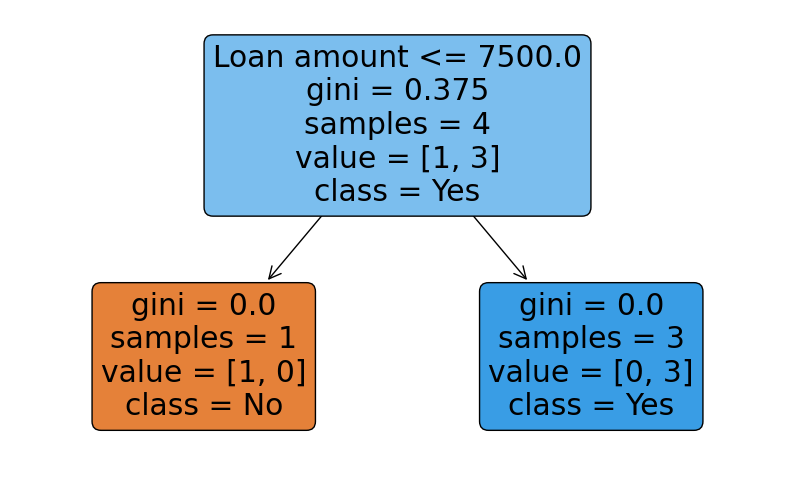

In [7]:
# Visualize your decision tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X_encoded.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

In [11]:
data = {
    'Estimated Demand': [10000],
    'Price per Unit': [40],
    'Cost per Unit': [20],
    'Fixed Launch Cost': [50000],
    'Probability': [0.6]
}

df = pd.DataFrame(data)

#total revenue
df['Total Revenue'] = df['Price per Unit'] * df['Estimated Demand']

#total cost
df['Manufacturing Cost'] = df['Cost per Unit'] * df['Estimated Demand']
df['Total Cost'] = df['Manufacturing Cost'] + df['Fixed Launch Cost']

#expected profit
df['Expected Profit'] = df.apply(lambda row: 200000 if row['Estimated Demand'] >= 10000 else 100000, axis=1)

#expected value
df['Expected Value'] = df['Expected Profit'] * df['Probability']


decision_tree = df[['Estimated Demand', 'Total Revenue', 'Total Cost', 'Expected Profit', 'Expected Value']]
print(decision_tree)


   Estimated Demand  Total Revenue  Total Cost  Expected Profit  \
0             10000         400000      250000           200000   

   Expected Value  
0        120000.0  


In [13]:
data = {
    'Estimated Demand': [10000],
    'Price per Unit': [40],
    'Cost per Unit': [20],
    'Fixed Launch Cost': [50000],
    'Probability': [0.6]
}

df = pd.DataFrame(data)

#expected value of launching
expected_value_launch = df[df['Expected Value'].notna()]['Expected Value'].sum()

#expected value of not launching
expected_value_not_launch = 0

print("Expected Value of Launching:", expected_value_launch)
print("Expected Value of Not Launching:", expected_value_not_launch)


KeyError: 'Expected Value'